In [1]:
import il_pedagogical as ilp
import il_parse as ila
import seaborn as sns

# pip imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as integrate

# non-pip
from potentials import *
from visualization import *
from lattice import *
from il import *

import numpy as np
import matplotlib.pyplot as plt
ini_pool_size = [25, 50, 75, 100]
plt.rcParams.update({'font.size': 18})


# Gaussian Potential

Look at imoprtance learning results for a Gaussian potential

## Distribution of $E_a$

In [2]:
il_gaussian = ila.Parser('output.json')

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# ilp.histogram(ax1, ax2, il_gaussian.true_barrier_heights(), il_gaussian.T())
# fig.tight_layout()

## Training the metric learning model

Model barriers predicted on the initial pool

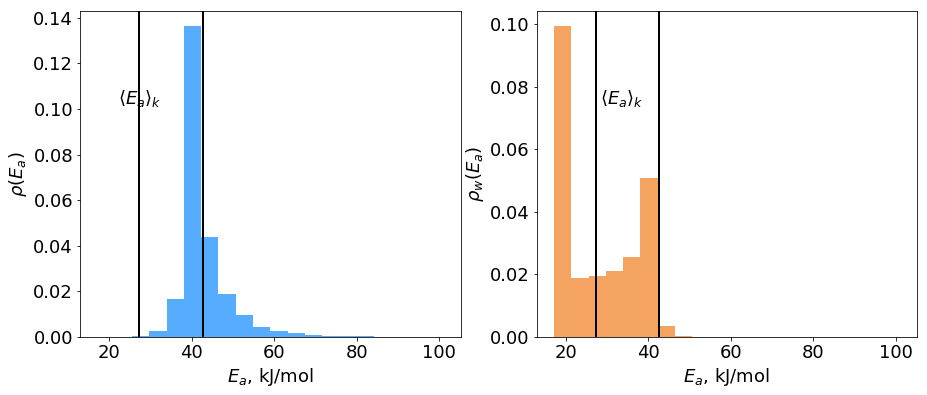

In [6]:
# plt.rcParams['figure.figsize'] = 13, 13
# fig = plt.figure()
# ax = fig.add_subplot(2, 2, 1)
il_gaussian = ila.Parser('output.json'.format(50))
# model_heights = il_gaussian.model_barrier_heights(0)
# initial_pool = il_gaussian.sampled_sites(0)
true_barriers = il_gaussian.true_barrier_heights()
# # plt.title('Iteration 0, Initial Pool = {}'.format(ini_pool_size[i]))
# # ilp.plot_trained(ax, model_heights[initial_pool], true_barriers[initial_pool], 2.5, len(initial_pool))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_xlabel(r'$E_a$, kJ/mol')
ax2.set_xlabel(r'$E_a$, kJ/mol')
T = 300
histogram(ax1, ax2, true_barriers, T, n_bins=20)
plt.show()


## Importance Learning Convergence

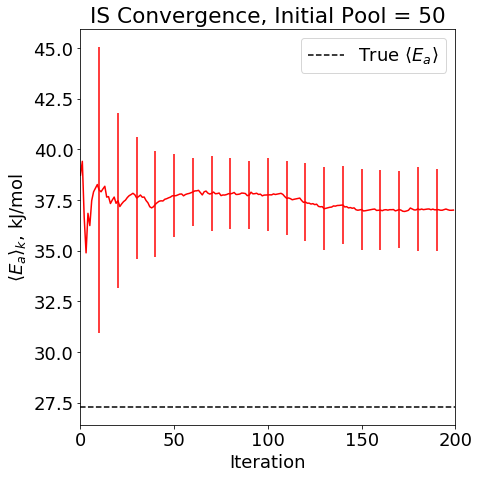

KeyError: '999'

In [10]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams.update({'font.size': 18})

fig = plt.figure()
# for i in range(4):
ax = fig.add_subplot(1, 1, 1)
il_gaussian = ila.Parser('output.json'.format(50))

avg_Ea_exact = il_gaussian.true_site_avg_Ea()
avg_Ea_pred = il_gaussian.all_site_avg_Ea()[0:250]
avg_Ea_pred_err = il_gaussian.all_site_Ea_sampling_error()[0:250]
n_iterations =il_gaussian.n_iterations


#     plt.subplot(2,2,i+1)
plt.title('IS Convergence, Initial Pool = {}'.format(50))
ilp.plot_convergence(ax, n_iterations, avg_Ea_pred, avg_Ea_pred_err, avg_Ea_exact, 10)
fig.tight_layout()
plt.show()
true = il_gaussian.sampled_barrier_heights(999)[50:250]
print(T)
print(np.mean(true))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.set_xlabel(r'$E_a$, kJ/mol')
ax2.set_xlabel(r'$E_a$, kJ/mol')
histogram(ax1, ax2, true, T, n_bins=20)
plt.show()
print(avg_Ea_exact)

(19418,)
34.453513905936425


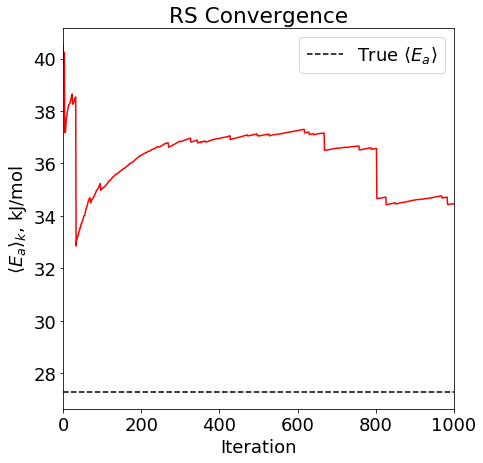

In [11]:
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams.update({'font.size': 18})
T = 300


plt.rcParams['figure.figsize'] = 7, 7
plt.rcParams.update({'font.size': 18})

fig = plt.figure()
# for i in range(4):
#     ax = fig.add_subplot(2, 2, i+1)
#     il_gaussian = ila.Parser('logs/g_potential_{}.json'.format(ini_pool_size[i]))

#     avg_Ea_exact = il_gaussian.true_site_avg_Ea()
#     avg_Ea_pred = il_gaussian.all_site_avg_Ea()
#     avg_Ea_pred_err = il_gaussian.all_site_Ea_sampling_error()
#     n_iterations =il_gaussian.n_iterations

# #     plt.subplot(2,2,i+1)
#     plt.title('IS Convergence, Initial Pool = {}'.format(ini_pool_size[i]))
#     ilp.plot_convergence(ax, n_iterations, avg_Ea_pred, avg_Ea_pred_err, avg_Ea_exact, 10)
# fig.tight_layout()
# plt.show()
    
# for i in range(4):
        
ax = fig.add_subplot(1, 1, 1)


il_gaussian = ila.Parser('output.json'.format(50))

true_barrier_heights = il_gaussian.true_barrier_heights() 
n_iterations =il_gaussian.n_iterations
n_iterations = 1000
rand_sampled = np.random.choice(np.arange(np.shape(true_barrier_heights)[0]),size=n_iterations,replace=True)
print(np.shape(true_barrier_heights))
print(ilp.k_weighted_avg_activation_E(true_barrier_heights[rand_sampled],T))
biased_error = ilp.biased_error(true_barrier_heights[rand_sampled])
avg_k_Ea = [ilp.k_weighted_avg_activation_E(true_barrier_heights[rand_sampled][0:i],T) for i in range(1,len(rand_sampled)+1)]
# print(avg_k_Ea)
unbiased_error = [ilp.unbiased_error(true_barrier_heights[rand_sampled[0:i]],T) for i in range(1,len(rand_sampled)+1)]


#     plt.subplot(2,2,i+1)
plt.title('RS Convergence')
#     plt.errorbar(np.arange(n_iterations), avg_k_Ea, yerr=unbiased_error,errorevery=20)
ilp.plot_convergence(ax, n_iterations, avg_k_Ea, unbiased_error, avg_Ea_exact, 1000)
#     ilp.plot_convergence(n_iterations, avg_k_Ea, unbiased_error, avg_Ea_exact)
#     plt.tight_layout()

plt.show()

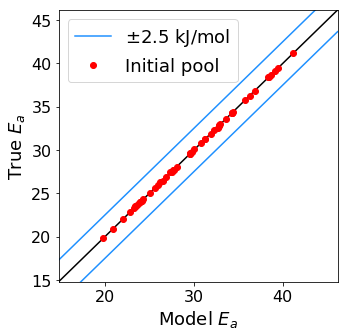

In [32]:
plt.rcParams['figure.figsize'] = 7 ,7
plt.rcParams.update({'font.size': 18})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

il_gaussian = ila.Parser('./g_potential_50.json')
model_heights = il_gaussian.model_barrier_heights(1)
initial_pool = il_gaussian.sampled_sites(0)
true_barriers = il_gaussian.true_barrier_heights()
sampled_sites = il_gaussian.sampled_sites(1)
ilp.plot_trained(ax,model_heights[sampled_sites], true_barriers[sampled_sites], 2.5, 51)
plt.show()

Text(0.5,1,'Model Fit for 50 Randomly Sampled Sites')

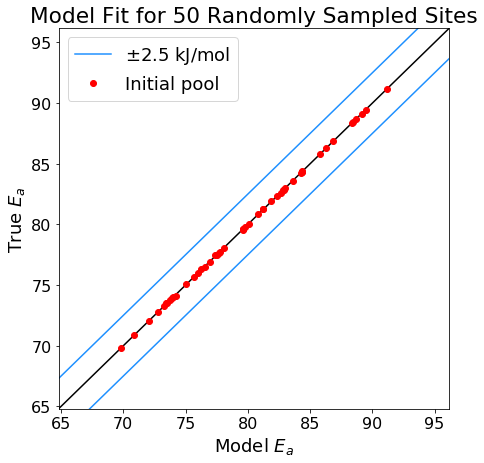

In [33]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams.update({'font.size': 18})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ilp.plot_trained(ax,model_heights[initial_pool]+50, true_barriers[initial_pool]+50, 2.5, len(initial_pool))
plt.title('Model Fit for 50 Randomly Sampled Sites')

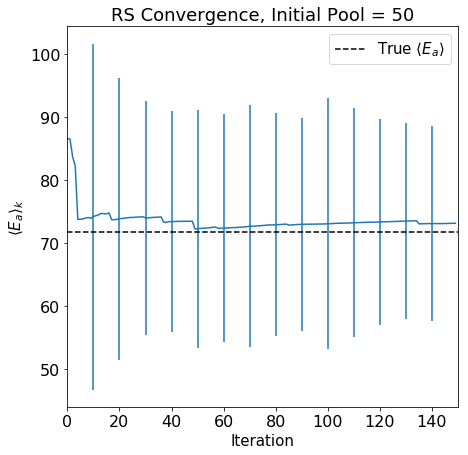

In [34]:

T = 300
plt.rcParams['figure.figsize'] = 7, 7
plt.rcParams.update({'font.size': 15})

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)


il_gaussian = ila.Parser('./g_potential_50.json')

true_barrier_heights = il_gaussian.true_barrier_heights() +50
n_iterations =il_gaussian.n_iterations
n_iterations = 150
rand_sampled = np.random.choice(np.arange(np.shape(true_barrier_heights)[0]),size=n_iterations,replace=True)
biased_error = ilp.biased_error(true_barrier_heights[rand_sampled])
avg_k_Ea = [ilp.k_weighted_avg_activation_E(true_barrier_heights[0:i],T) for i in range(1,len(rand_sampled)+1)]

unbiased_error = [ilp.unbiased_error(true_barrier_heights[rand_sampled[0:i]],T) for i in range(1,len(rand_sampled)+1)]


plt.title('RS Convergence, Initial Pool = {}'.format(50))
#     plt.errorbar(np.arange(n_iterations), avg_k_Ea, yerr=unbiased_error,errorevery=20)
ilp.plot_convergence(ax, n_iterations, avg_k_Ea, unbiased_error, avg_Ea_exact+50, 10)
#     ilp.plot_convergence(n_iterations, avg_k_Ea, unbiased_error, avg_Ea_exact)
#     plt.tight_layout()
plt.show()